In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PROJECT_DIR = "/content/drive/My Drive/Project_EnsembleLearning/"

In [ ]:
import pandas as pd

In [ ]:
# load full data

data_df = pd.read_csv(PROJECT_DIR + "dataset_full/ratings.csv")
data_df.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [ ]:
data_df['movieIdCat'] = data_df.movieId.astype('category').cat.codes.values
data_df['userIdCat'] = data_df.userId.astype('category').cat.codes.values
data_df.head()

,userId,movieId,rating,timestamp,movieIdCat,userIdCat
0,1,307,3.5,1256677221,302,0
1,1,481,3.5,1256677456,474,0
2,1,1091,1.5,1256677471,1042,0
3,1,1257,4.5,1256677460,1193,0
4,1,1449,4.5,1256677264,1377,0


In [ ]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot

n_users, n_movies = len(data_df.userIdCat.unique()), len(data_df.movieIdCat.unique())
n_latent_factors = 3

In [ ]:
# neural network setup

n_latent_factors_user = 5
n_latent_factors_movie = 8

movie_input = keras.layers.Input(shape=[1],name='Movie')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2,name='Dropout-1')(movie_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = keras.layers.Dropout(0.2,name='Dropout-2')(user_vec)


concat = keras.layers.concatenate([movie_vec, user_vec], axis=-1)
concat_dropout = keras.layers.Dropout(0.2,name='Dropout-3')(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout-4')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout-5')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.001)
model = keras.Model([user_input, movie_input], result)
model.compile(optimizer=adam,loss= 'mean_absolute_error')

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 8)         184320      Movie[0][0]                      
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         59100       User[0][0]                       
_______________________________________________________________________________________

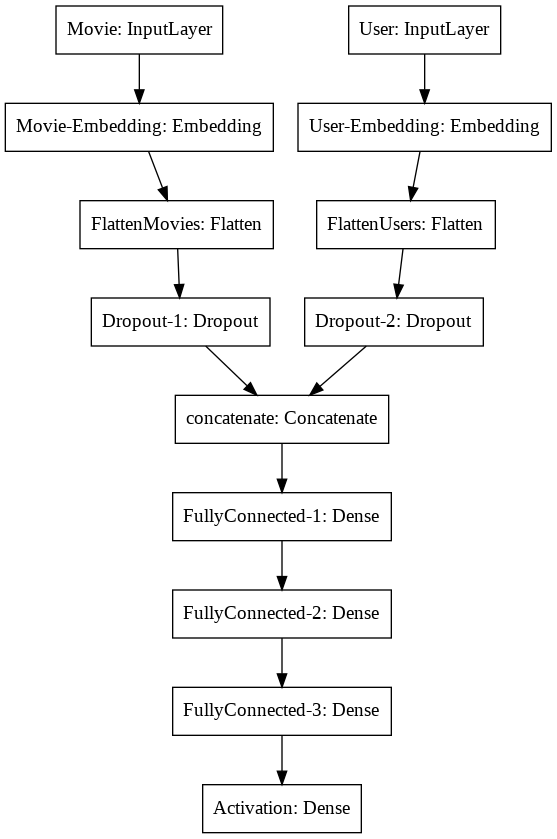

In [ ]:
keras.utils.plot_model(model)

In [ ]:
# load training data

train_df = pd.read_csv(PROJECT_DIR + "dataset_split/training_set.csv")
train_df.head()

,userId,movieId,rating,timestamp
0,1,481,3.5,1256677456
1,1,1591,1.5,1256677475
2,1,2478,4.0,1256677239
3,1,2840,3.0,1256677500
4,1,3698,3.5,1256677243


In [ ]:
train_df['movieIdCat'] = train_df.movieId.astype('category').cat.codes.values
train_df['userIdCat'] = train_df.userId.astype('category').cat.codes.values
train_df.head()

,userId,movieId,rating,timestamp,movieIdCat,userIdCat
0,1,481,3.5,1256677456,473,0
1,1,1591,1.5,1256677475,1477,0
2,1,2478,4.0,1256677239,2306,0
3,1,2840,3.0,1256677500,2655,0
4,1,3698,3.5,1256677243,3457,0


In [ ]:
# training the model

history = model.fit([train_df.userIdCat, train_df.movieIdCat], train_df.rating, epochs=30, verbose=1)

Epoch 1/30
29466/29466 [==============================] - 94s 3ms/step - loss: 0.7121
Epoch 2/30
29466/29466 [==============================] - 95s 3ms/step - loss: 0.6751
Epoch 3/30
29466/29466 [==============================] - 94s 3ms/step - loss: 0.6617
Epoch 4/30
29466/29466 [==============================] - 94s 3ms/step - loss: 0.6557
Epoch 5/30
29466/29466 [==============================] - 95s 3ms/step - loss: 0.6513
Epoch 6/30
29466/29466 [==============================] - 93s 3ms/step - loss: 0.6481
Epoch 7/30
29466/29466 [==============================] - 93s 3ms/step - loss: 0.6455
Epoch 8/30
29466/29466 [==============================] - 95s 3ms/step - loss: 0.6431
Epoch 9/30
29466/29466 [==============================] - 93s 3ms/step - loss: 0.6414
Epoch 10/30
29466/29466 [==============================] - 94s 3ms/step - loss: 0.6397
Epoch 11/30
29466/29466 [==============================] - 93s 3ms/step - loss: 0.6390
Epoch 12/30
29466/29466 [===========================

In [ ]:
model.save('reco_NNmodel.h5')

In [ ]:
# load validation data

validate_df = pd.read_csv(PROJECT_DIR + "dataset_split/validation_set.csv")
validate_df.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,1590,2.5,1256677236
2,1,3424,4.5,1256677444
3,2,170,3.5,1192913581
4,2,1296,4.5,1192913608


In [ ]:
validate_df['movieIdCat'] = validate_df.movieId.astype('category').cat.codes.values
validate_df['userIdCat'] = validate_df.userId.astype('category').cat.codes.values
validate_df.head()

,userId,movieId,rating,timestamp,movieIdCat,userIdCat
0,1,307,3.5,1256677221,286,0
1,1,1590,2.5,1256677236,1361,0
2,1,3424,4.5,1256677444,2911,0
3,2,170,3.5,1192913581,153,1
4,2,1296,4.5,1192913608,1130,1


In [ ]:
from keras.models import load_model
model = load_model('reco_NNmodel.h5')

In [ ]:
# predict on validation set using the trained model

validate_df['predicted_rating'] = model.predict([validate_df.userIdCat, validate_df.movieIdCat])
validate_df.head()

,userId,movieId,rating,timestamp,movieIdCat,userIdCat,predicted_rating
0,1,307,3.5,1256677221,286,0,1.874426
1,1,1590,2.5,1256677236,1361,0,1.791898
2,1,3424,4.5,1256677444,2911,0,3.000674
3,2,170,3.5,1192913581,153,1,3.004210
4,2,1296,4.5,1192913608,1130,1,4.011952


In [ ]:
# predicted ratings

validate_df[['userId', 'movieId', 'rating', 'predicted_rating']]

,userId,movieId,rating,predicted_rating
0,1,307,3.5,1.874426
1,1,1590,2.5,1.791898
2,1,3424,4.5,3.000674
3,2,170,3.5,3.004210
4,2,1296,4.5,4.011952
...,...,...,...,...
235449,11819,49822,4.0,3.998772
235450,11819,52281,2.5,3.993529
235451,11819,53125,2.0,3.894986
235452,11819,54116,3.5,4.011596


In [ ]:
# save prediction to file

validate_df[['userId', 'movieId', 'rating', 'predicted_rating']].to_csv(
    PROJECT_DIR + 'predictions/prediction_neuralnet.csv') 